<a href="https://colab.research.google.com/github/Sakshi1007/MLnow_2.0/blob/main/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
cd'/content/drive/MyDrive/ColabNotebooks/Online Retail/HR'

/content/drive/MyDrive/ColabNotebooks/Online Retail/HR


In [125]:
import numpy as np
import pandas as pd

In [126]:
data=pd.read_csv("1628185392814.csv")

In [127]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [128]:
data.tail(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14984,0.40,0.56,2,148,3,0,1,0,technical,medium
14985,0.91,0.99,5,254,5,0,1,0,technical,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low
14987,0.90,0.70,5,206,4,0,1,0,technical,low
14988,0.46,0.55,2,145,3,0,1,0,technical,low
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low


**We can see from above data set that department is not much impact on salary.So we can drop that column***

In [129]:
data.shape

(14999, 10)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [131]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [134]:
print(f'salary: {data.salary.unique()}')
#print(f'Departments: {data.Departments.unique()}')



salary: ['low' 'medium' 'high']


**Coversion from categical to numerical**

In [136]:
data['salary']=data['salary'].apply({'low':3,'medium':2,'high':1}.get)

In [137]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,3
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,3
4,0.37,0.52,2,159,3,0,1,0,sales,3


***Visualisation***

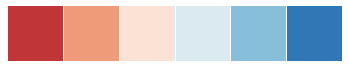

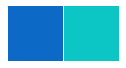

In [139]:
#To visualize our results 

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("RdBu"))
pal = sns.color_palette('RdBu', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#0c69c6", "#0cc6c6"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [140]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

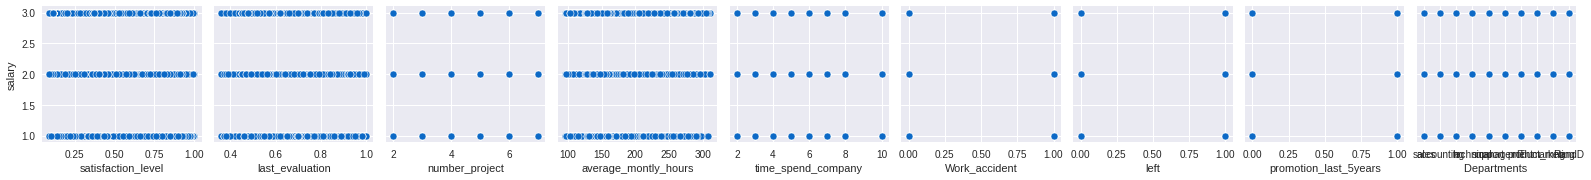

In [141]:
sns.pairplot(data,x_vars=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company', 
                          'Work_accident', 'left','promotion_last_5years', 'Departments '],y_vars=['salary'],diag_kind='kde')

***Model Training***

In [142]:
#Data Split
x=data.drop('salary',axis=1).values
y=data['salary'].values
print(x)
print(y)

[[0.38 0.53 2 ... 1 0 'sales']
 [0.8 0.86 5 ... 1 0 'sales']
 [0.11 0.88 7 ... 1 0 'sales']
 ...
 [0.37 0.53 2 ... 1 0 'support']
 [0.11 0.96 6 ... 1 0 'support']
 [0.37 0.52 2 ... 1 0 'support']]
[3 2 2 ... 3 3 3]


In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [145]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

ValueError: ignored

In [147]:
data['Departments']

KeyError: ignored

In [148]:
from sklearn.tree import DecisionTreeClassifier
dtree.fit()

NameError: ignored